In [6]:
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
from pathlib import Path

In [7]:
data = pd.read_csv(Path('yjy_data.csv'), index_col=0)

/tmp/ipykernel_85/3373758425.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(Path('yjy_data.csv'), index_col=0)


In [8]:
# data cleaning
# Drop empty data & drop duplicates
data = data.replace(r'^\s*$', pd.np.nan, regex=True)
data.dropna(how="any", inplace=True)

data = data.drop_duplicates()
data = data.reset_index(drop=True)
data = data.astype(float)

# Drop DK/NA data
data.replace({'PJOB': 998}, pd.np.nan, inplace=True)
data.replace({'PJOB': 999}, pd.np.nan, inplace=True)
data.dropna(how="any", inplace=True)

/tmp/ipykernel_85/1639390138.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  data = data.replace(r'^\s*$', pd.np.nan, regex=True)
/tmp/ipykernel_85/1639390138.py:11: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  data.replace({'PJOB': 998}, pd.np.nan, inplace=True)
/tmp/ipykernel_85/1639390138.py:12: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  data.replace({'PJOB': 999}, pd.np.nan, inplace=True)


In [9]:
# EDA Question: Does there exist a correlation between people's expectation of unemployment chance
# over the next 5 years and their household income in the previous year?

# Assumptions: There migh be a weak correlation.

Text(0.5, 1.0, '"Expectation of Unemployment chance vs Income"')

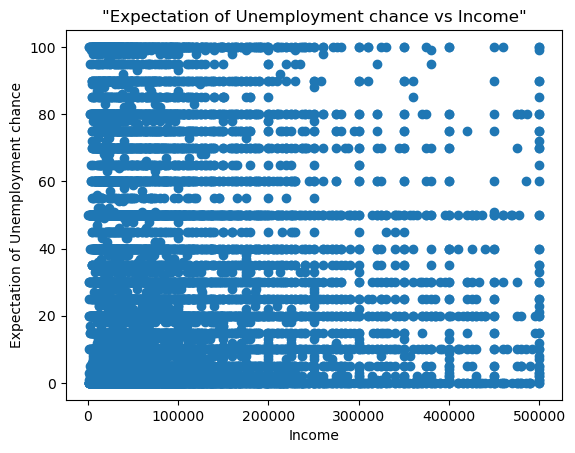

In [10]:
# plot a scatterplot of income v pjob
plt.scatter(data['INCOME'], data['PJOB'])

# add labels and title
plt.xlabel('Income')
plt.ylabel('Expectation of Unemployment chance')
plt.title('"Expectation of Unemployment chance vs Income"')

In [11]:
# EDA Findings: There exists a weak correlation. People with lower household income tend to think of their unemployment 
# chance to be lower. I infer the reason behind it might be that lower income jobs are more stable. 